### TSNE

In [1]:
%matplotlib ipympl

In [2]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib.gridspec import GridSpec

# ------------------ Data Loading Functions ------------------

def load_jsonl(file_path):
    embeddings = []
    levels = []
    with open(file_path, 'r') as f:
        for line in f:
            # Parse each line as JSON and append it to the list
            obj = json.loads(line)
            embeddings.append(obj['embedding'])
            levels.append(obj['level'])
    return embeddings, levels

# ------------------ TSNE and Data Preparation ------------------

def get_tsne_result(embeddings, n_components=2, perplexity=30, random_state=42):
    """Generate TSNE result from embeddings."""
    tsne = TSNE(n_components, perplexity=perplexity, random_state=random_state)
    tsne_result = tsne.fit_transform(embeddings)
    return tsne_result

def create_tsne_dataframe(tsne_result, levels):
    """Create a DataFrame with TSNE result and corresponding labels."""
    return pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': levels})

# ------------------ Plotting Functions ------------------

def plot_tsne_result(tsne_result_df, unique_labels, palette): #nodes_file_name
    """Plot TSNE result using a scatter plot with subplots for individual labels."""
    # Create a figure and a GridSpec layout
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(2, 3, width_ratios=[2, 1, 1])

    # Create the large plot on the left (spanning both rows)
    ax_main = fig.add_subplot(gs[:, 0])
    sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='label', palette=palette, ax=ax_main, alpha=0.5)
    ax_main.set_title('All Data')

    # Get x and y axis limits from the main plot
    xlim = ax_main.get_xlim()
    ylim = ax_main.get_ylim()

    # Create the 2x2 grid on the right for individual label plots
    for i, label in enumerate(unique_labels[:4]):
        ax = fig.add_subplot(gs[i // 2, i % 2 + 1])
        label_data = tsne_result_df[tsne_result_df['label'] == label]
        sns.scatterplot(data=label_data, x='tsne_1', y='tsne_2', color=palette[i], ax=ax, alpha=0.8)

        # Set x and y limits to match the main plot
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.set_title(f'Label {label}')
        ax.legend([label])

    # # Adjust layout and save the image
    # plt.tight_layout()
    
    # Enable interactive mode
    plt.ion()  # Use this in scripts to enable interactive mode
    plt.show()  # Show the plot
    # plt.savefig(f"tsne_result_{nodes_file_name}.png")
    # plt.close()

In [21]:
# Load embeddings
all_embeddings = []
all_levels = []

files = os.listdir(os.path.abspath('../1_get_embedding_value/contexts'))
files = sorted(files, key=lambda x: int(x.split('.')[0].split('_')[-1]))

for file_name in files[-4:]:
    embeddings_file_path = f"../1_get_embedding_value/contexts/{file_name}"
    print(embeddings_file_path)
    embeddings, levels = load_jsonl(embeddings_file_path)
    
    # Append to the combined lists
    all_embeddings.extend(embeddings)
    all_levels.extend(levels)

merged_embeddings = np.array(all_embeddings)
embeddings = merged_embeddings
levels = all_levels

../1_get_embedding_value/contexts/embeddings_gpt-4o-batch-all-target_1_parser_ManuallyHierarchicalNodeParser_7652_gpu_V100_nodeNum_50_pid_21.jsonl
../1_get_embedding_value/contexts/embeddings_gpt-4o-batch-all-target_1_parser_ManuallyHierarchicalNodeParser_7652_gpu_V100_nodeNum_50_pid_28.jsonl
../1_get_embedding_value/contexts/embeddings_gpt-4o-batch-all-target_1_parser_ManuallyHierarchicalNodeParser_7652_gpu_V100_nodeNum_50_pid_34.jsonl
../1_get_embedding_value/contexts/embeddings_gpt-4o-batch-all-target_1_parser_ManuallyHierarchicalNodeParser_7652_gpu_V100_nodeNum_50_pid_36.jsonl


In [25]:
tuple(merged_embeddings[0])

(-0.005610615015029907,
 0.0015298387734219432,
 -0.004354885779321194,
 0.007696591783314943,
 0.001412588870152831,
 -0.006877916865050793,
 0.009832647629082203,
 -0.0023387752007693052,
 -0.004186358768492937,
 -0.0009535410790704191,
 -0.007416856475174427,
 -0.014541971497237682,
 -0.0006687188288196921,
 0.001233046525157988,
 -0.005617011338472366,
 0.007249111775308847,
 -0.003922100644558668,
 0.0042366208508610725,
 -0.010812296532094479,
 0.009582835249602795,
 -0.0017396166222169995,
 0.00658118911087513,
 -0.010321978479623795,
 -0.004830766934901476,
 0.0040842569433152676,
 0.010138513520359993,
 0.013371340930461884,
 0.00035731823300011456,
 -0.020295757800340652,
 -0.013532882556319237,
 0.0050703901797533035,
 -0.005097128916531801,
 0.008483445271849632,
 0.006577102933079004,
 -0.01464630663394928,
 -0.008134649135172367,
 -0.004043878987431526,
 -0.008107942529022694,
 -0.005034766159951687,
 -0.0029342814814299345,
 0.013615984469652176,
 0.012270159088075161,
 

In [33]:
df = pd.DataFrame({
    'embeddings': [tuple(embedding) for embedding in merged_embeddings],
    'level': all_levels
})
df

,embeddings,level
0,"(-0.005610615015029907, 0.0015298387734219432,...",document
1,"(-0.005610611755400896, 0.0015298401704058051,...",section
2,"(-0.005610615015029907, 0.0015298387734219432,...",section
3,"(-0.005610616412013769, 0.0015298383077606559,...",section
4,"(-0.005610611755400896, 0.0015298401704058051,...",section
...,...,...
48911,"(-0.005610615015029907, 0.0015298383077606559,...",multi-sentences
48912,"(-0.005610594060271978, 0.0015298330690711737,...",multi-sentences
48913,"(-0.005610594060271978, 0.0015298330690711737,...",multi-sentences
48914,"(-0.005610611755400896, 0.0015298401704058051,...",multi-sentences


In [34]:
def unique_values(filtered_df):
    # Count unique tsne values for each level
    doc_count = len(filtered_df[filtered_df['level'] == 'document']['embeddings'].unique())
    section_count = len(filtered_df[filtered_df['level'] == 'section']['embeddings'].unique())
    paragraph_count = len(filtered_df[filtered_df['level'] == 'paragraph']['embeddings'].unique())
    multi_sent_count = len(filtered_df[filtered_df['level'] == 'multi-sentences']['embeddings'].unique())

    # Print formatted results
    print(f"Unique embeddings counts:")
    print(f"Document: {doc_count}")
    print(f"Section: {section_count}")
    print(f"Paragraph: {paragraph_count}")
    print(f"Multi-Sentences: {multi_sent_count}")
    
unique_values(df)

Unique embeddings counts:
Document: 6
Section: 9
Paragraph: 32
Multi-Sentences: 10


In [6]:
# Generate TSNE result
tsne_results = []

In [6]:
# Generate tsne with different parameters
for random_state in [42, 300, 1001]:
    print(f"random_state: {random_state}")
    tsne_one_row = []
    for perplexity in [10, 20, 30, 40, 50]:
        print(f"property: {perplexity}")
        tsne_one_row.append(get_tsne_result(embeddings, 2, perplexity, random_state))
    tsne_results.append(tsne_one_row)

random_state: 42
property: 10
property: 20
property: 30
property: 40
property: 50
random_state: 300
property: 10
property: 20
property: 30
property: 40
property: 50
random_state: 1001
property: 10
property: 20
property: 30
property: 40
property: 50


In [19]:
def save_tsne_result():
    data_to_save = []

    # Iterate over the random_state and properties
    for i, random_state in enumerate([42, 300, 1001]):
        for j, property in enumerate([10, 20, 30, 40, 50]):
            # Get the t-SNE results for this combination
            tsne_result = tsne_results[i][j]
            
            # For each embedding row, append the random_state, property, levels, and t-SNE coordinates
            for idx in range(len(levels)):
                data_to_save.append([random_state, property, levels[idx], tsne_result[idx][0], tsne_result[idx][1]])

    # Create a Pandas DataFrame from the collected data
    df = pd.DataFrame(data_to_save, columns=['random_state', 'perplexity', 'level', 'tsne_x', 'tsne_y'])

    # Save the DataFrame to a CSV file
    df.to_csv('tsne_results_with_levels.csv', index=False)
save_tsne_result()

In [7]:
import pandas as pd
def load_tsne_result(file_path='tsne_results_with_levels.csv'):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    df['tsne'] = df.apply(lambda row: (row['tsne_x'], row['tsne_y']), axis=1)

    
    # Optional: Convert levels or other columns to categorical types if needed
    df['level'] = df['level'].astype('category')
    
    return df
df = load_tsne_result()

In [18]:
def unique_values(filtered_df):
    # Count unique tsne values for each level
    doc_count = len(filtered_df[filtered_df['level'] == 'document']['tsne'].unique())
    section_count = len(filtered_df[filtered_df['level'] == 'section']['tsne'].unique())
    paragraph_count = len(filtered_df[filtered_df['level'] == 'paragraph']['tsne'].unique())
    multi_sent_count = len(filtered_df[filtered_df['level'] == 'multi-sentences']['tsne'].unique())

    # Print formatted results
    print(f"Unique tsne counts:")
    print(f"Document: {doc_count}")
    print(f"Section: {section_count}")
    print(f"Paragraph: {paragraph_count}")
    print(f"Multi-Sentences: {multi_sent_count}")


for r in df['random_state'].unique():
    for p in df['property'].unique():
        print(f"random state: {random_state}   propelxity: {p}")
        filtered_df = df[(df['random_state'] == r) & (df['property'] == p)]
        unique_values(filtered_df)



42
300
1001


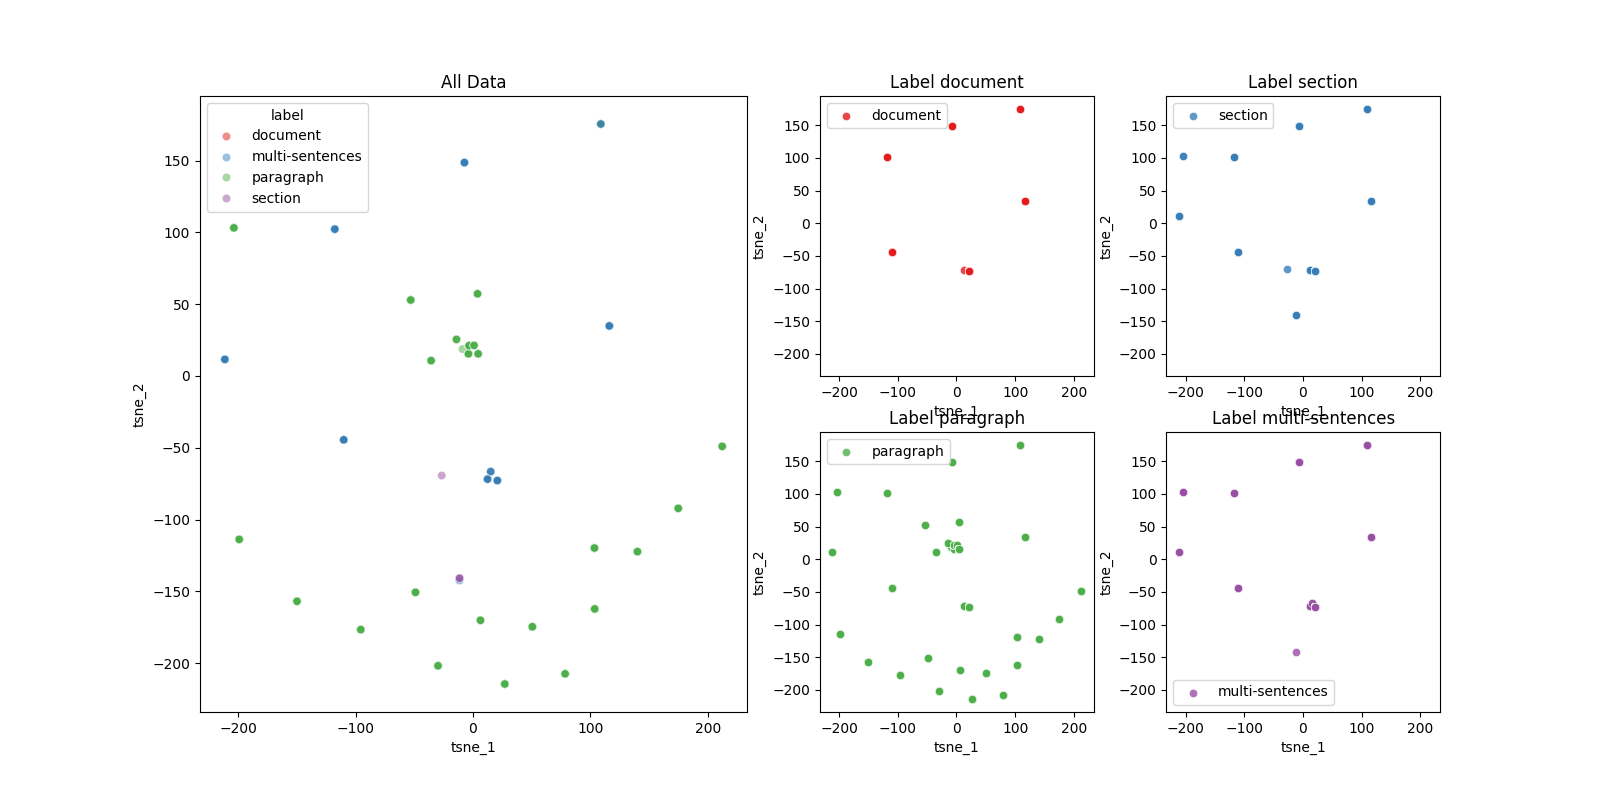

In [6]:
# Create a DataFrame with TSNE result and labels
tsne_result_df = create_tsne_dataframe(filtered_df[['tsne_x', 'tsne_y']].to_numpy(), filtered_df['level'])

# Define unique labels and color palette
unique_labels = tsne_result_df['label'].unique()
palette = sns.color_palette('Set1', len(unique_labels))

# Plot and save the TSNE result
plot_tsne_result(tsne_result_df, unique_labels, palette)

### TSNE - queries

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib.gridspec import GridSpec

# ------------------ Data Loading Functions ------------------

def load_jsonl(file_path):
    embeddings = []
    levels = []
    with open(file_path, 'r') as f:
        for line in f:
            # Parse each line as JSON and append it to the list
            obj = json.loads(line)
            embeddings.append(obj['embedding'])
            levels.append(obj['level'])
    return np.array(embeddings), levels

# ------------------ TSNE and Data Preparation ------------------

def get_tsne_result(embeddings, n_components=2):
    """Generate TSNE result from embeddings."""
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(embeddings)
    return tsne_result

def create_tsne_dataframe(tsne_result, levels):
    """Create a DataFrame with TSNE result and corresponding labels."""
    return pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': levels})

# ------------------ Plotting Functions ------------------

def plot_tsne_result(tsne_result_df, unique_labels, palette, nodes_file_name):
    """Plot TSNE result using a scatter plot with subplots for individual labels."""
    # Create a figure and a GridSpec layout
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(2, 3, width_ratios=[2, 1, 1])

    # Create the large plot on the left (spanning both rows)
    ax_main = fig.add_subplot(gs[:, 0])
    sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='label', palette=palette, ax=ax_main, alpha=0.5)
    ax_main.set_title('All Data')

    # Get x and y axis limits from the main plot
    xlim = ax_main.get_xlim()
    ylim = ax_main.get_ylim()

    # Create the 2x2 grid on the right for individual label plots
    for i, label in enumerate(unique_labels[:4]):
        ax = fig.add_subplot(gs[i // 2, i % 2 + 1])
        label_data = tsne_result_df[tsne_result_df['label'] == label]
        sns.scatterplot(data=label_data, x='tsne_1', y='tsne_2', color=palette[i], ax=ax, alpha=0.8)

        # Set x and y limits to match the main plot
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.set_title(f'Label {label}')
        ax.legend([label])

    # Adjust layout and save the image
    plt.tight_layout()
    plt.savefig(f"tsne_result_{nodes_file_name}.png")
    plt.close()

In [2]:
pid_num = 1
# Load embeddings
embeddings_file_path = f"../1_get_embedding_value/data/embeddings_question_pid_{pid_num}.jsonl"
embeddings, levels = load_jsonl(embeddings_file_path)

# Generate TSNE result
tsne_result = get_tsne_result(embeddings, 2)

In [5]:
# Create a DataFrame with TSNE result and labels
tsne_result_df = create_tsne_dataframe(tsne_result, levels)

# Define unique labels and color palette
unique_labels = tsne_result_df['label'].unique()
palette = sns.color_palette('Set1', len(unique_labels))

# Plot and save the TSNE result
plot_tsne_result(tsne_result_df, unique_labels, palette, embeddings_file_path.split('/')[-1].split('.')[0])

### Load data

In [24]:
import pandas as pd


In [25]:
# Load CSV file into DataFrame
df_pca = pd.read_hdf("cluster_result_pca.h5")

In [3]:
df_ae = pd.read_hdf("cluster_result_ae.h5")

In [30]:
df_kmeans = pd.read_hdf("cluster_result_kmeans.h5")

In [ ]:
import os, sys
sys.path.insert(0, os.path.abspath('.'))
from custom.io import load_nodes_jsonl

def load_nodes(pid_num, cache_dir):
    print("Loading nodes")
    file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
    file_path = os.path.join(cache_dir, file_name)
    nodes = load_nodes_jsonl(file_path)
    return nodes

nodes = load_nodes(1, os.path.abspath('./.save'))

### PCA

In [ ]:
df_pca

In [ ]:
import os, sys
sys.path.insert(0, os.path.abspath('.'))
from custom.io import load_nodes_jsonl

def load_nodes(pid_num, cache_dir):
    print("Loading nodes")
    file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
    file_path = os.path.join(cache_dir, file_name)
    nodes = load_nodes_jsonl(file_path)
    return nodes

nodes = load_nodes(1, os.path.abspath('./.save'))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_kmeans['kmean_labels'], cmap='viridis', s = 50, alpha=0.5) 

# Create the scatter plot
# level2int = {level : i for i, level in enumerate(['document', 'section', 'paragraph', 'multi-sentences'])}
# scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=[level2int[node.metadata['level']] for node in nodes], cmap='viridis', s = 50, alpha=0.5) 
# Reverse the mapping for easy label creation
# int2level = {v: k for k, v in level2int.items()}

# Set the ticks to match the integer labels for the levels
# cbar = plt.colorbar(scatter, label='labels')
# cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticklabels(['document', 'section', 'paragraph', 'multi-sentences'])

# Create a legend using custom patches
# handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
#            for level in level2int]
unique_labels = np.unique(df_kmeans['kmean_labels'])
# handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
#            for level in level2int]
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Label {label}') for label in unique_labels]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')


# Add labels to the points
# for i, node in enumerate(nodes):
#     label = node.metadata['level']  # Get the text label
#     plt.text(df_pca['PCA1'].iloc[i], df_pca['PCA2'].iloc[i], label, fontsize=8, ha='right', color='black')

# Add titles and labels
plt.title('PCA of Clustered Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### AutoEncoder

In [ ]:
df_ae

In [21]:
selected_node = [node.metadata['level'] in ['document', 'section', 'paragraph', 'multi-sentences'] for node in nodes]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot the results
plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_ae['AE1'], df_ae['AE2'], c=df_kmeans['kmean_labels'], cmap='viridis', s=50)

# Create the scatter plot
level2int = {level : i for i, level in enumerate(['document', 'section', 'paragraph', 'multi-sentences'])}
scatter = plt.scatter(df_ae['AE1'][selected_node], df_ae['AE2'][selected_node], c=[level2int[node.metadata['level']] for i, node in enumerate(nodes) if selected_node[i]], cmap='viridis', s = 50, alpha=0.5) 
# Reverse the mapping for easy label creation
int2level = {v: k for k, v in level2int.items()}

# Create a legend using custom patches
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
           for level in level2int]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')

plt.title('AutoEncoder of Clustered Embeddings')
plt.xlabel('AutoEncoder Component 1')
plt.ylabel('AutoEncoder Component 2')
plt.show()

# Plot the results
plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_kmeans['kmean_labels'], cmap='viridis', s = 50, alpha=0.5) 


# Set the ticks to match the integer labels for the levels
# cbar = plt.colorbar(scatter, label='labels')
# cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticklabels(['document', 'section', 'paragraph', 'multi-sentences'])
